In [1]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#Code KNN Classifier from scratch :)

class KNN:
    
    #initialise variables
    def __init__(self, k = 5, p = 2):
        self.k = k
        self.p = p
    
    #compute distance metrics
    def distance_metric(self, x1, x2):
        """
         Compute distance between two datapoints using Minkowski formula

         If p = 1, Manhattan distance is obtained

         If p = 2, Euclidean distance is obtained

         Else, Minkowski distance is obtained

         Returns distance as a float
         """
        return np.sum(np.abs(x1 - x2)**self.p)**(1/self.p)
    
    def fit(self, x, y):
        """
        Fit the model, with training data as x and target values as y
        """
        self.x_train = x
        self.y_train = y
    
    def predict(self, X):
        """
        Predict class labels for provided data, where X is data used for prediction

        Returns predicted class labels as an array-like object
        """
        predicted_labels = [self.predict_for_one(x) for x in X]
        return np.array(predicted_labels)
    
    def predict_for_one(self, x):
        """
        Predict class label for a single sample, x
        
        Returns predicted class label as an int
        """
        #compute distances between x and all datapoints in training set
        distances = [self.distance_metric(x, x_train) for x_train in self.x_train]

        #sort by distance and return indices of first k neighbours
        k_indices = np.argsort(distances)[:self.k]
        #extract labels of k-nearest neighbours
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        #return the most common class label as prediction
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [3]:
#Test KNN From-Scratch Algorithm and compare performance to sklearn's KNNClassifier

#prepare data

#load iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

#split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#standardise features
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)

In [4]:
#create KNN classifier using from-scratch algorithm
knn = KNN(3, 1)

#fit classifier to data
knn.fit(x_train_std, y_train)

#predict labels of test set
y_pred_knn = knn.predict(x_test_std)

#print accuracy of classifier
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.2%}')

Accuracy: 95.56%


In [5]:
#create KNN classifier using sklearn
knnsk = KNeighborsClassifier(3, p = 1)

#fit classifier to data
knnsk.fit(x_train_std, y_train)

#predict labels of test set
y_pred_knnsk = knnsk.predict(x_test_std)

#print accuracy of classifier
print(f'Accuracy: {accuracy_score(y_test, y_pred_knnsk):.2%}')

Accuracy: 95.56%


Good news! Both algorithms attained the same accuracy score when they classify using Manhattan distance (p = 1) with 3-nearest neighbours (k = 3). Let's see if this holds true for other values of p and k.

In [6]:
#compute accuracy scores for each KNN classifier, over a range of k values

#compute accuracies for from-scratch KNN classifier, for different k values
def get_accuracies_knn(p):
    """
    Compute accuracies for from-scratch KNN classifier, for a range of k values
    
    Returns results in a list
    """
    accuracies = []
    for k in range(1,20):
        knn = KNN(k, p)
        knn.fit(x_train_std, y_train)
        y_pred = knn.predict(x_test_std)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

#compute accuracies for sklearn KNN classifier, for different k values
def get_accuracies_knnsk(p):
    """
    Compute accuracies for sklearn KNN classifier, for a range of k values
    
    Returns results in a list
    """
    accuracies = []
    for k in range(1,20):
        knnsk = KNeighborsClassifier(k, p = p)
        knnsk.fit(x_train_std, y_train)
        y_pred = knnsk.predict(x_test_std)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

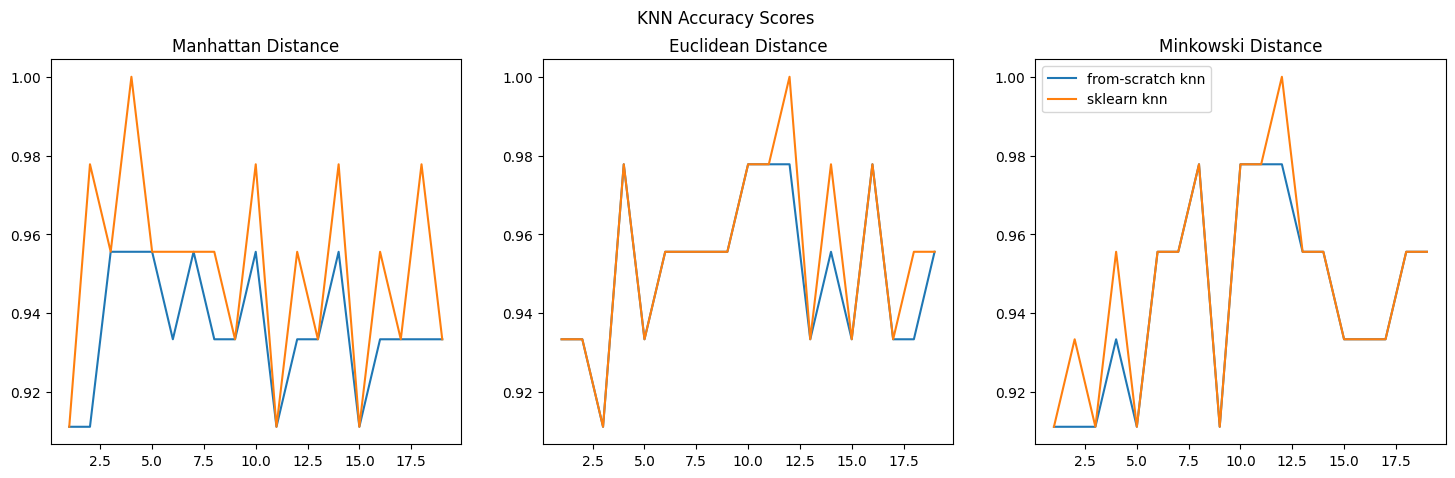

In [7]:
#plot the accuracies of both KNN classifiers for different distance metrics and compare their results

fig, axs = plt.subplots(1, 3, figsize = (18,5))
fig.suptitle('KNN Accuracy Scores')

#plot accuracies for each distance metric, comparing accuracy scores of both classifiers on the same graph
axs[0].plot(range(1,20), get_accuracies_knn(1))
axs[0].plot(range(1,20), get_accuracies_knnsk(1))
axs[0].set_title('Manhattan Distance')
axs[1].plot(range(1,20), get_accuracies_knn(2))
axs[1].plot(range(1,20), get_accuracies_knnsk(2))
axs[1].set_title('Euclidean Distance')
axs[2].plot(range(1,20), get_accuracies_knn(3))
axs[2].plot(range(1,20), get_accuracies_knnsk(3))
axs[2].set_title('Minkowski Distance')
plt.legend(['from-scratch knn', 'sklearn knn'], loc = 'upper left')

It seems that the performances of the KNN classifiers are more similar when the data is classified using Euclidean and Minkowski distance. For Manhattan distance, the difference in accuracy scores between the from-scratch KNN classifier and sklearn's KNN classifier is more pronounced.

In [14]:
#compute average accuracy scores for each KNN classifier and the difference between their average scores, for different distance metrics

def get_avg_acc_score(p):
    """
    Compute average accuracy scores for each KNN classifier and the difference between their average scores
    
    If p = 1, Manhattan distance is used
    
    If p = 2, Euclidean distance is used
    
    Else, Minkowski distance is used
    """
    acc_score_knn = get_accuracies_knn(p)
    acc_score_knnsk = get_accuracies_knnsk(p)
    avg_acc_score_knn = np.mean(acc_score_knn)
    avg_acc_score_knnsk = np.mean(acc_score_knnsk)

    if p == 1:
        print(f'Average Accuracy Score (Manhattan), From-Scratch KNN: {avg_acc_score_knn:.2%}')
        print(f'Average Accuracy Score (Manhattan), sklearn KNN: {avg_acc_score_knnsk:.2%}')
        print(f'Difference in Average Accuracy Score (Manhattan): {np.abs(avg_acc_score_knn - avg_acc_score_knnsk):.2%}')

    elif p == 2:
        print(f'Average Accuracy Score (Euclidean), From-Scratch KNN: {avg_acc_score_knn:.2%}')
        print(f'Average Accuracy Score (Euclidean), sklearn KNN: {avg_acc_score_knnsk:.2%}')
        print(f'Difference in Average Accuracy Score (Euclidean): {np.abs(avg_acc_score_knn - avg_acc_score_knnsk):.2%}')
    
    else:
        print(f'Average Accuracy Score (Minkowski), From-Scratch KNN: {avg_acc_score_knn:.2%}')
        print(f'Average Accuracy Score (Minkowski), sklearn KNN: {avg_acc_score_knnsk:.2%}')
        print(f'Difference in Average Accuracy Score (Minkowski): {np.abs(avg_acc_score_knn - avg_acc_score_knnsk):.2%}')

In [9]:
#compute average accuracy scores using Manhattan distance
get_avg_acc_score(1)

Average Accuracy Score (Manhattan), From-Scratch KNN: 93.57%
Average Accuracy Score (Manhattan), sklearn KNN: 95.09%
Difference in Average Accuracy Score (Manhattan): 1.52%


In [10]:
#compute average accuracy scores using Euclidean distance
get_avg_acc_score(2)

Average Accuracy Score (Euclidean), From-Scratch KNN: 95.09%
Average Accuracy Score (Euclidean), sklearn KNN: 95.44%
Difference in Average Accuracy Score (Euclidean): 0.35%


In [11]:
#compute average accuracy scores using Minkowski distance
get_avg_acc_score(3)

Average Accuracy Score (Minkowski), From-Scratch KNN: 94.39%
Average Accuracy Score (Minkowski), sklearn KNN: 94.74%
Difference in Average Accuracy Score (Minkowski): 0.35%


The from-scratch KNN algorithm is highly accurate and performs well with all 3 distance metrics, attaining high average accuracy scores of 93.57% and above. It is 0.35% less accurate than the sklearn KNN algorithm when classifying using Euclidean and Minkowski distance, and 1.52% less accurate when classifying using Manhattan distance. Thus, the performance of the from-scratch KNN algorithm is almost just as good as sklearn's KNN algorithm. 

In [12]:
#compare accuracy scores between the two classifiers for Manhattan distance and check for possible patterns

acc_score_knn = get_accuracies_knn(1)
acc_score_knnsk = get_accuracies_knnsk(1)

differences = []

#compare accuracy scores for each k value
for i in range(0,19):
    differences.append(np.not_equal(acc_score_knn[i], acc_score_knnsk[i]))

differences

[False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False]

After comparing accuracy scores between the two classifiers for each value of k, it can be observed that the from-scratch KNN algorithm is less accurate than the sklearn KNN algorithm when k is even. This is possibly due to ties in voting. It is possible that the classifiers handle ties differently, resulting in differences in classification decisions.